1. INTRODUCTION
    * 1.1. IMPORTING LIBRARIES 
    * 1.2. IMPORTING DATASET
   
2. EXPLORATORY DATA ANALYSIS AND DATA CLEANING

3. DATA VISUALISATION

4. FEATURE ENGINEERING 
    * 3.1 DROPPING UNNECESSARY COLUMNS
    * 3.2 HANDLING OUTLIERS
    * 3.3 DATA ENCODING - ONE HOT ENCODING 
    * 3.4 DATA RESAMPLING TECHNIQUE
        * SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE (SMOTE)
    * 3.5 DATA SPLITTING 
    * 3.6 FEATURE SCALING
         * 3.6.1 STANDARDISATION
5. FEATURE SELECTION
    * CORRELATION
    * UNIVARIATE SELECTION
         
6. MODEL EVALUATION AND SELECTION
    * 4.1 CROSS VALIDATION
    * 4.2 MODEL PERFORMANCE AND EVALUATION
    * 4.3 MODEL SELECTION   
    
7. CONCLUSION

### What is customer attrition?
This is a situation that is common in business sector especially in banking and finance where customer or clients end their relationship with a company. This is also known as customer defection.

### Customer defection Modelling with machine learning

The dataset of the customers in a company with their details including sex, age, estimated salary, credit score, etc. The aim of the project isusing ANN and random forest to predict whether a customer will leave the bank in the future or not. Other objectives would be:

1. Identify customers who are getting churned 
2. Identifying the most important predictors
2. The algorithm with the best performance 

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# import tensorflow libraries for ANN
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

### Dataset description

### Input variables 
    
1. CustomerId: It is a unique identifier attached to each customer.
2. Surname: The last names of each customer.
3. CreditScore: A credit score, also known as a credit rating, is a number that reflects the likelihood of you paying credit back. This is an important criteria any financial service industry take into consideration for loan evaluation.
4. Geography: This denotes countries of respective customers. There are three countries in our geography column.
5. Age: The age of customers.
6. Balance: The amount of balance in customer's account.
7. HasCrCard. This column indicates customers with amd without credit card.
8. Tenure: This is the duration to which a customer has been in relationship with the company.
9. EstimatedSalary: The customer's estimated salary.

### Target variable 
    
Exited - has the customers that churned (binary: "1" means "YES", "0" means "NO").

### Exploratory data analysis 

This is the first step in machine learning after gathering data. This technique involves analysing and investigating data set by summarizing the characteristics often by visualisation. We are going to visualise the relationship of the features with respect to target variable.

0    7963
1    2037
Name: Exited, dtype: int64

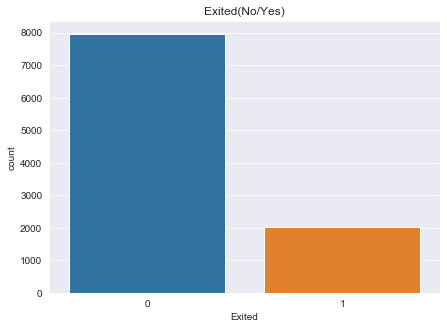

In [4]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "Exited",data = dataset)
plt.title("Exited(No/Yes)")
dataset["Exited"].value_counts()

As we can see from the graph above, our dataset is imbalanced as we have non-churned customers to be the majority class with 7963 rows of observation and churned customers as the minority class with 2029 data points.

([<matplotlib.patches.Wedge at 0x1aaa8f43448>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'NO'),
  Text(0.8823431426537006, -0.6568642010431012, 'YES')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.63%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.37%')])

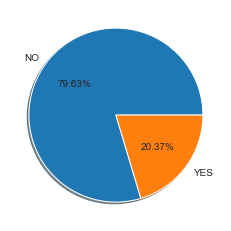

In [5]:
plt.pie(x = dataset["Exited"].value_counts(), labels =["NO","YES"], shadow= True, autopct='%1.2f%%')

The pie chart gave us the percentage of the churned customers vs non-churned customers. Our data is highly imbalanced with the negative (non-exit) class dominating approximately 80% of the data.
**Percentage of non-churned customers is 79.69%** and **percentage of churned customers is 20.31%**.
Before we proceed to balance our dataset, lets do some exploration to have an understanding of what we are working with.

In [6]:
dataset.groupby("Exited").mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


### Observations:

* The average age of the customers that churned is higher than of non-churned customers. 
* Customers having relationship with the company have an average years spent of approximately 5 whic is slightly higher than the exited custmers.
* Supringly, the balance left in the account are higher for customers that churned.

Going forward, we can calculate categorical mean for other categorical features such as geography and gender.

In [7]:
dataset.groupby("Gender").mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


### Inference:

* The average age of female customers is higher than the male customers.
* Credit score for female is similar to that of the male customers.

In [8]:
dataset.groupby("Geography").mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


### Insights:

* Average age for the three countries are between 38 and 39 above.
* German customers on have a higher average balance than the other two countries.
    

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
print("shape of the data: {}".format(dataset.shape))

shape of the data: (10000, 14)


In [11]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The output above shows the descriptive statistics of our customer's dataset.

In [12]:
dataset.duplicated().sum()

0

In [13]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

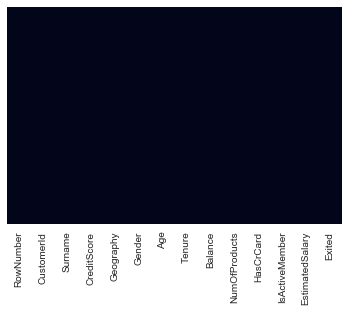

In [14]:
sns.heatmap(dataset.isnull(),yticklabels= False, cbar= False)

There are no missing and duplicate values in our dataset

### Data visualisation

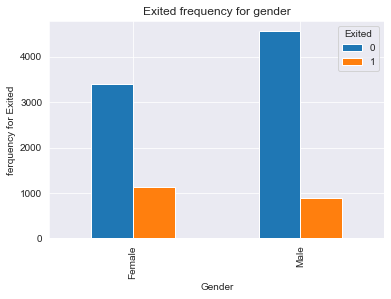

In [15]:
pd.crosstab(dataset.Gender, dataset.Exited).plot(kind="bar", title= "Exited frequency for gender")
plt.xlabel("Gender")
plt.ylabel("ferquency for Exited")
plt.savefig("Exited_Gender")

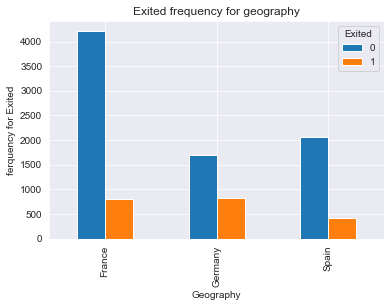

In [16]:
pd.crosstab(dataset.Geography, dataset.Exited).plot(kind="bar", title= "Exited frequency for geography")
plt.xlabel("Geography")
plt.ylabel("ferquency for Exited")
plt.savefig("Exited_Geography")

Exited
Gender Exited        
Female 0         3404
       1         1139
Male   0         4559
       1          898

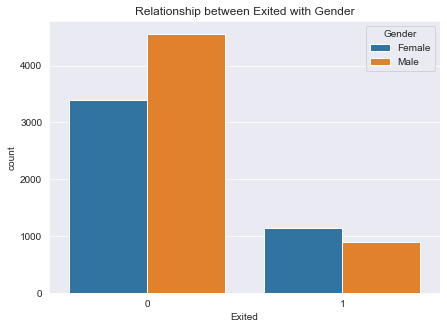

In [17]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "Exited",hue = "Gender", data = dataset)
plt.title("Relationship between Exited with Gender")
pd.DataFrame(dataset.groupby(["Gender", "Exited"])["Exited"].count())

In [18]:
# rename geography with country
dataset.rename({"Geography": "Country"}, axis = 1, inplace=True)

Exited
Country Exited        
France  0         4204
        1          810
Germany 0         1695
        1          814
Spain   0         2064
        1          413

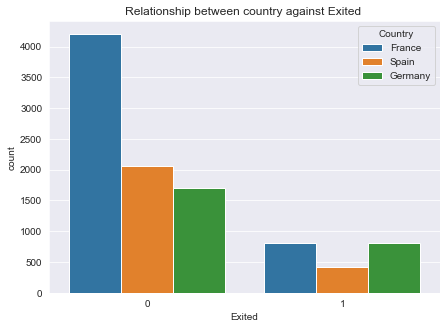

In [19]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "Exited",hue = "Country", data = dataset)
plt.title("Relationship between country against Exited ")
pd.DataFrame(dataset.groupby(["Country", "Exited"])["Exited"].count())

HasCrCard
Country HasCrCard           
France  0               1471
        1               3543
Germany 0                718
        1               1791
Spain   0                756
        1               1721

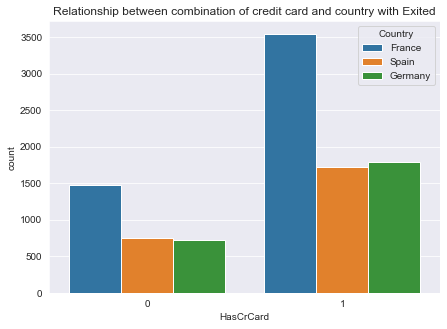

In [20]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "HasCrCard",hue = "Country", data = dataset)
plt.title("Relationship between combination of credit card and country with Exited")
pd.DataFrame(dataset.groupby(["Country", "HasCrCard"])["HasCrCard"].count())

HasCrCard
Gender HasCrCard           
Female 0               1351
       1               3192
Male   0               1594
       1               3863

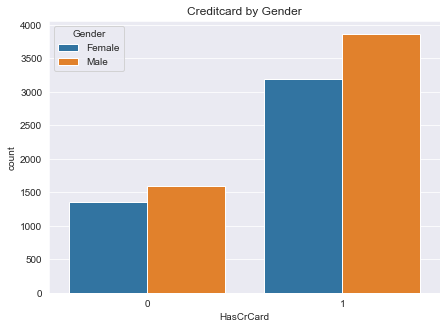

In [21]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "HasCrCard",hue = "Gender", data = dataset)
plt.title("Creditcard by Gender")
pd.DataFrame(dataset.groupby(["Gender", "HasCrCard"])["HasCrCard"].count())

Exited
NumOfProducts Exited        
1             0         3675
              1         1409
2             0         4242
              1          348
3             0           46
              1          220
4             1           60

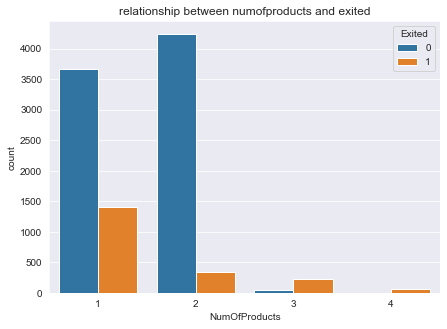

In [22]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "NumOfProducts",hue = "Exited", data = dataset)
plt.title("relationship between numofproducts and exited")
pd.DataFrame(dataset.groupby(["NumOfProducts", "Exited"])["Exited"].count())

In [47]:
dataset['Exited'] = dataset["Exited"].apply(lambda x: "Exit" if x == 1 else "Not exit")
dataset["IsActiveMember"] = dataset["IsActiveMember"].apply(lambda x: "Active" if x == 1 else "Not Active")

Exited
Tenure Exited        
0      0          318
       1           95
1      0          803
       1          232
2      0          847
       1          201
3      0          796
       1          213
4      0          786
       1          203
5      0          803
       1          209
6      0          771
       1          196
7      0          851
       1          177
8      0          828
       1          197
9      0          771
       1          213
10     0          389
       1          101

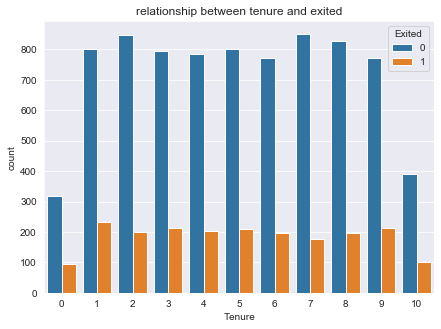

In [23]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "Tenure",hue = "Exited", data = dataset)
plt.title("relationship between tenure and exited")
pd.DataFrame(dataset.groupby(["Tenure", "Exited"])["Exited"].count())

Exited
IsActiveMember Exited        
0              0         3547
               1         1302
1              0         4416
               1          735

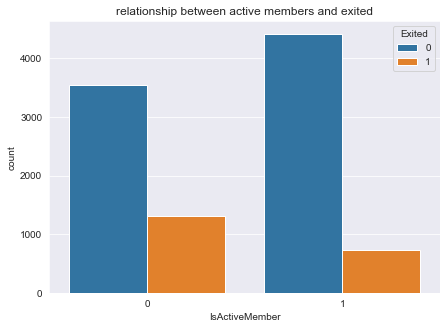

In [24]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.countplot(x= "IsActiveMember",hue = "Exited", data = dataset)
plt.title("relationship between active members and exited")
pd.DataFrame(dataset.groupby(["IsActiveMember", "Exited"])["Exited"].count())

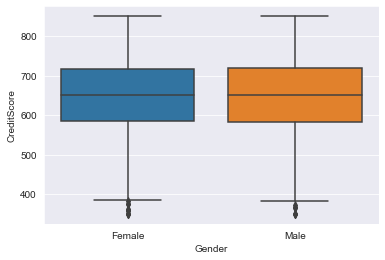

In [25]:
sns.boxplot(x = dataset["Gender"], y = dataset["CreditScore"], data = dataset)

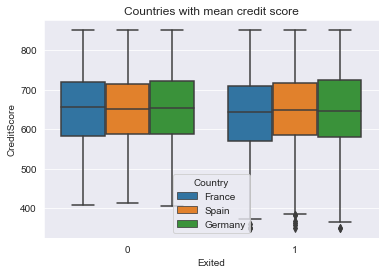

In [26]:
figure = sns.boxplot(x = dataset["Exited"], y = "CreditScore",hue ="Country", data = dataset)
plt.title("Countries with mean credit score")
plt.show()

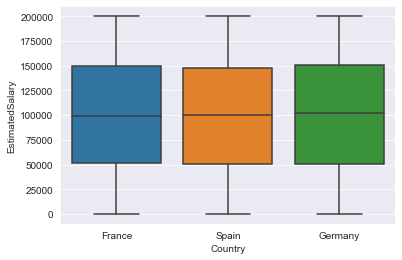

In [27]:
figure = sns.boxplot(x = dataset["Country"], y = "EstimatedSalary", data = dataset)

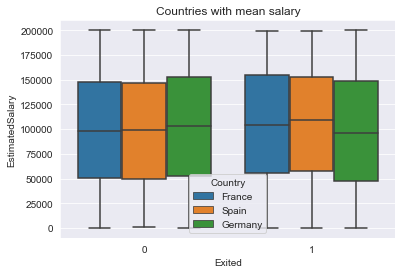

In [28]:
figure = sns.boxplot(x = dataset["Exited"], y = "EstimatedSalary",hue ="Country", data = dataset)
plt.title("Countries with mean salary")
plt.show()

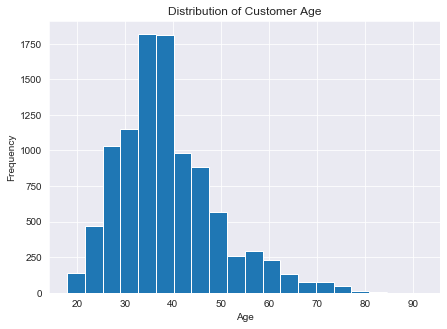

In [29]:
plt.figure(figsize=(7,5))
dataset["Age"].plot(kind = 'hist', bins = 20)
plt.xlabel("Age")
plt.title("Distribution of Customer Age")
plt.show()

Most of the customers in our dataset are in the age range of 35-40.

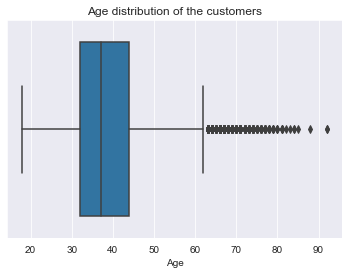

In [30]:
sns.boxplot(x = 'Age', orient='h', data = dataset)
plt.title("Age distribution of the customers")
plt.show()

From the plot, we see that the median age of the customers is about 38. There are also some customers who are 60 above.

### Inferences:
1. Visualising the target variable, it shows that the class distribution is imbalanced i.e skewed or biased. The majority of the class goes to the negative class (0) and the minority class is 1. it is a special case for classification problem.
2. High proportion of male decided to continue their relationship with the bank while more female customers are exited from the bank.
3. France happens to have the highest number of non-churned customers compared to the other two countries. On the otherhand, France and Germany have almost similar number of churned customers.
4. French customers have more people with possession of credit cards also, they have the highest number of people without credit card. Spain has the lowest number compared to the other countries in terms of customers not having credit card.
5. When analysing the number of male to female with credit card. There seems to be a higher proportion of male customers with and without credit card than female customers.
6. More male customers with more creditscore than the female customers.
7. Comparing the estimated salary with the countries indicated that germany have the highest salary.
8. Distribution of customer age seems to follow a fairly normal distribution.

### Dropping Unnecessary columns

In [31]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace=True)

The above coulmns wered dropped as they most likely any impact on the target variable

In [32]:
print("shape of the dataset before removing the outliers: {}".format(dataset.shape))

shape of the dataset before removing the outliers: (10000, 11)


### Detect Outliers

These are datapoint that seems unusual from the observation in a dataset. We have to detect them and decide how we can handle the anomaly.

In [33]:
# detect the outliers
def detect_outliers(data):
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std 
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [34]:
detect_outliers(dataset["Balance"])

[]

In [35]:
EstimatedSalary_list = dataset["EstimatedSalary"].tolist()
EstimatedSalary_outlier = detect_outliers(EstimatedSalary_list)
EstimatedSalary_outlier

[]

In [36]:
detect_outliers(dataset["CreditScore"])

[359, 350, 350, 358, 351, 350, 350, 350]

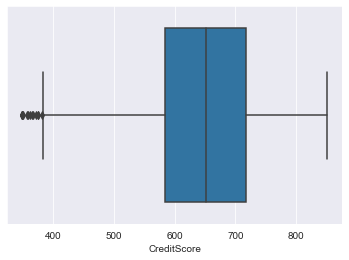

In [37]:
sns.boxplot(x = dataset["CreditScore"], data = dataset, orient="h")

By visualising the distribution of creditscore, we can see that there are outliers. Hence, we have to remove them to improve the quality of our data.

In [38]:
dataset.drop(dataset[dataset["CreditScore"] <= 359].index, inplace=True)

In [39]:
print("shape of the dataset after removing the outliers: {}".format(dataset.shape))

shape of the dataset after removing the outliers: (9992, 11)


### Normality check

In [40]:
from scipy.stats import shapiro
stat, p = shapiro(dataset["Age"])
print(stat, p)

def normality_check(dataset):
    alpha = 0.5
    if p > alpha:
        print("data follows a gaussian distribution (fail to reject Ho)")
    else:
        print("data is not normally distributed")
print(normality_check(dataset["Age"]))

0.9439641833305359 0.0
data is not normally distributed
None


Text(0.5, 1.0, 'Q-Q plot of Age distribution')

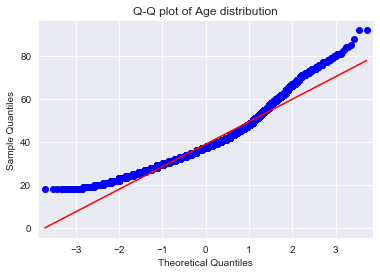

In [41]:
import statsmodels.api as sm
sm.qqplot(dataset["Age"], line = "s", )
plt.title("Q-Q plot of Age distribution")

### Encoding categorical variables 
This step involves coverting categorical data into numerical values as this is the only way machine learning algorithms can learn. 

In [42]:
# specifying the target and the independent variables 
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [43]:
# one hot encoding 
dummy = pd.get_dummies(X[["Country", "Gender"]])

# drop the columns before encoding
X = X.drop(["Country","Gender"], axis=1)


# join the dummy with the original independent variables 
X = pd.concat([X, dummy], axis=1)

# view the first five rows of the newly dataframe 
X.head(5)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [44]:
# splitting data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [45]:
columns = X_train.columns

### Handling imbalanced dataset
Imbalanced dataset is not so rare situation in handling real world scenarios. An imbalanced dataset is a dataset where the distribution of the classes are not uniform. A machine learning is not robust when it uses imbalanced dataset for training purpose. Therefore, a balanced dataset is preferred for training machine learning models. From the visualisation of our dataset, it is indicated that our dataset is not uniformly distributed. Hence, we have to handle this issue by implementing aynthetic minority oversampling technique (SMOTE).

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

X_train_new = pd.DataFrame(data=X_train_new,columns=columns)
y_train_new = pd.DataFrame(data=y_train_new,columns=['Exited'])


# we can Check the numbers of our data
print("length of oversampled data is: ",len(X_train_new))
print("Number of no exited in oversampled data:",len(y_train_new[y_train_new['Exited']==0]))
print("Number of exited:",len(y_train_new[y_train_new['Exited']==1]))

length of oversampled data is:  11148
Number of no exited in oversampled data: 5574
Number of exited: 5574


In [47]:
X_train_new.shape

(11148, 13)

In [48]:
X_train_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,516,50,5,0.00,1,0,1,146145.93,0,0,1,0,1
1,648,41,5,123049.21,1,0,1,5066.76,0,1,0,0,1
2,511,58,0,149117.31,1,1,1,162599.51,1,0,0,0,1
3,678,40,3,128398.38,1,1,0,168658.30,0,0,1,1,0
4,744,29,1,43504.42,1,1,1,119327.75,1,0,0,0,1


Now we a have balanced dataset, then i can proceed to train our models.

### Feature selection
The goal of selecting features is to improve the performance of our trained model and reduce overfitting i.e to have important predictors to put forward in our model. There are several techniques to be considered but in this project, we have a look at two types which are; correlation and univariate statistics.

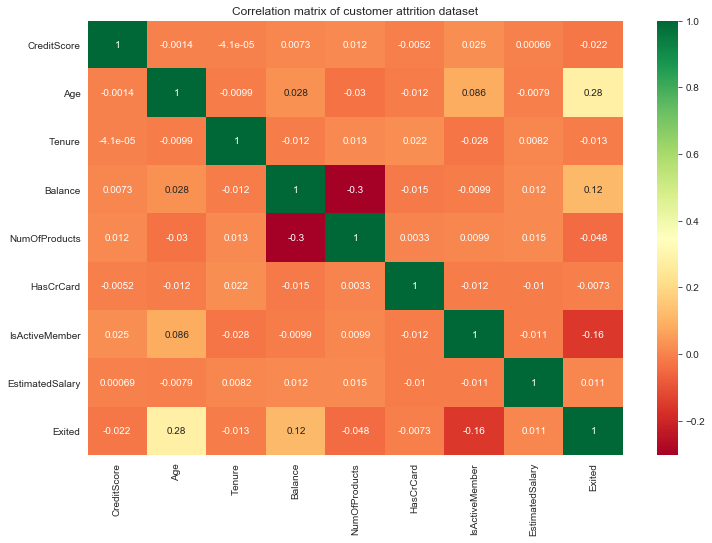

In [49]:
# correlation matrix of the dataset
plt.figure(figsize=(12,8))
dataset_corr = dataset.corr()
sns.heatmap(dataset_corr, annot=True, cmap = 'RdYlGn')
plt.title("Correlation matrix of customer attrition dataset")
plt.show()

In [50]:
from sklearn.feature_selection import chi2, SelectKBest
best_features = SelectKBest(score_func = chi2, k = 10)
best_features_fit = best_features.fit(X_train_new, y_train_new)
scores = pd.DataFrame(best_features_fit.scores_)
columns = pd.DataFrame(X_train_new.columns)

# concat the two dataframe
features_scores = pd.concat([columns, scores], axis = 1)

# naing the dataframe columns
features_scores.columns = ["features","scores"]

# visualising the feature importance
print(features_scores.nlargest(5,"scores"))

          features        scores
3          Balance  1.231800e+07
7  EstimatedSalary  1.067063e+05
1              Age  3.558712e+03
6   IsActiveMember  8.993660e+02
8   Country_France  6.155095e+02


[0.07917531 0.14912595 0.06434721 0.09144488 0.09529397 0.02214802
 0.09506841 0.08546064 0.08376698 0.03282853 0.0622234  0.06765893
 0.07145777]


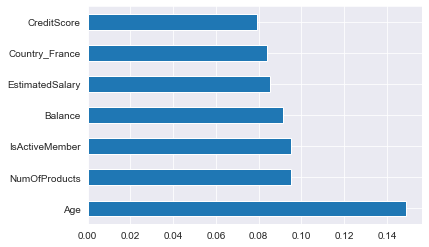

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_new,y_train_new)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [51]:
# splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled_over, y_resampled_over, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 13)
(3186, 13)
(12740,)
(3186,)


### Feature 

### Data model

In [57]:
# Logistics regression
from sklearn.feature_selection import RFE

log = LogisticRegression()
rfe = RFE(log, 10)
rfe = rfe.fit(X_train_new, y_train_new)

print(rfe.ranking_)
print(rfe.support_)

for i in range(X_train_new.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

[2 1 1 3 1 1 1 4 1 1 1 1 1]
[False  True  True False  True  True  True False  True  True  True  True
  True]
Column: 0, Selected False, Rank: 2.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000


rfe hashelped us select relevant features: "

In [53]:
import statsmodels.api as sm
log_model = sm.Logit(y_train_new,X_train_new)
result = log_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.369409
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                11148
Model:                          Logit   Df Residuals:                    11135
Method:                           MLE   Df Model:                           12
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                  0.4671
Time:                        22:34:28   Log-Likelihood:                -4118.2
converged:                       True   LL-Null:                       -7727.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore         0.0031      0.000     13.020      0.000       0.003       0.004
Age                 0.1033      0.003     37.374      0.000       0.098       0.109
Tenure              0.0025      0.010      0.259      0.796      -0.017       0.022
Balance          2.811e-06   4.99e-07      5.627      0.000    1.83e-06    3.79e-06
NumOfProducts      -0.2266      0.047     -4.822      0.000      -0.319      -0.134
HasCrCard          -0.3857      0.058     -6.669      0.000      -0.499      -0.272
IsActiveMember     -1.5528      0.061    -25.636      0.000      -1.672      -1.434
EstimatedSalary  1.452e-06   4.73e-07      3.073      0.002    5.26e-07    2.38e-06
Country_France     -3.4822      0.135    -25.779      0.000      -3.747      -3.217
Country_Germany    -2.5452      0.138    -18.435      0.000      -2.816      -2.275
Country_Spain      -3.6259      0.144    -25.143      0.000      -3.909      -3.343
Gender_Female      -2.7084      0.134    -20.206      0.000      -2.971      -2.446
Gender_Male        -3.2053      0.135    -23.819      0.000      -3.469      -2.942
===================================================================================
"""

In [54]:
log_prob = log.intercept_
log_coef = log.coef_
print(log_prob,log_coef)

[-4.02045777e-06] [[-3.83183247e-03  5.58235765e-02 -1.21311416e-03  4.07413257e-06
  -1.76553182e-04 -6.59405071e-05 -1.45515227e-03 -7.59101320e-07
  -6.67467430e-04  9.70272574e-04 -3.06825600e-04  1.05136071e-03
  -1.05538117e-03]]


In [56]:
Y_prob= log.predict_proba(X_train)[:,1]
print(Y_prob)

[0.52251323 0.49230996 0.6107518  ... 0.45708452 0.34325956 0.5241961 ]


In [66]:
age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
Age_group = pd.cut(dataset["Age"], range(10 101 10), right = False, labels= age_labels)

SyntaxError: invalid syntax (<ipython-input-66-e26362144190>, line 2)